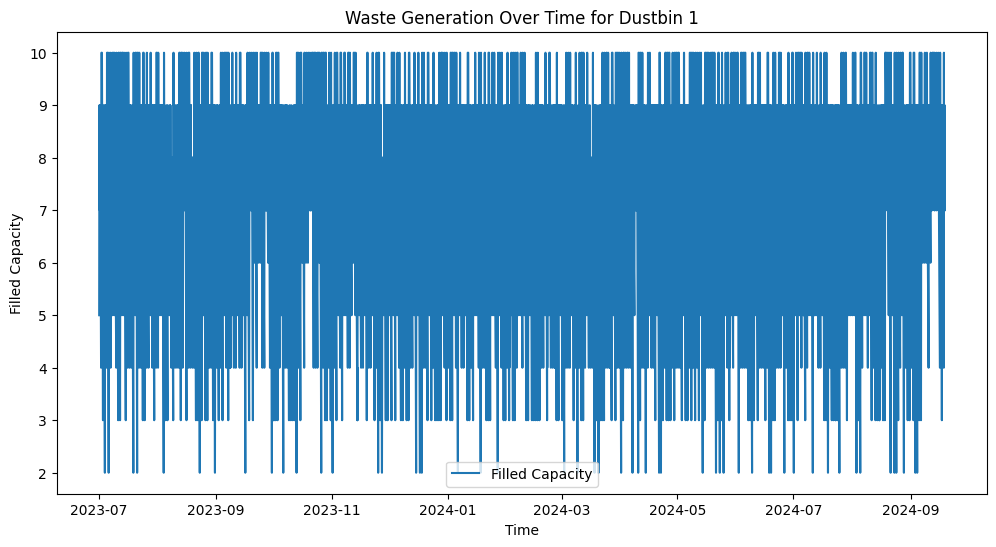

c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import math

# Load the dataset
data = pd.read_csv("synthetic_waste_data.csv")

# Convert 'date' and 'time' columns to datetime format
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'], format='%Y-%m-%d %H:%M')

# Sort by datetime just to ensure correct order
data = data.sort_values(by='datetime')

# Set datetime as the index for time series analysis
data.set_index('datetime', inplace=True)

# Let's focus on one dustbin for prediction (e.g., dustbin_id=1)
bin_data = data[data['dustbin_id'] == 1]['filled_capacity']

# Visualize the data for dustbin 1
plt.figure(figsize=(12,6))
plt.plot(bin_data, label='Filled Capacity')
plt.title('Waste Generation Over Time for Dustbin 1')
plt.xlabel('Time')
plt.ylabel('Filled Capacity')
plt.legend()
plt.show()

# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(bin_data) * 0.95)
train_data, test_data = bin_data[:train_size], bin_data[train_size:]

# Define the SARIMA model order
p = 1  # autoregressive terms
d = 1  # number of differencing
q = 1  # moving average terms
seasonal_order = (1, 1, 1, 24)  # (P, D, Q, S), where S=24 for daily seasonality

# Fit the SARIMA model
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(test_data, predictions))
print(f'RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data, label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='red', linestyle='--')
plt.title('E-SARIMA Predictions vs Actual (Dustbin 1)')
plt.xlabel('Time')
plt.ylabel('Filled Capacity')
plt.legend()
plt.show()

# Full graph combining training and test data
plt.figure(figsize=(12,6))
plt.plot(bin_data.index, bin_data, label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted (Test)', color='red', linestyle='--')
plt.title('Waste Generation - Full Time Series with E-SARIMA Predictions (Dustbin 1)')
plt.xlabel('Time')
plt.ylabel('Filled Capacity')
plt.legend()
plt.show()

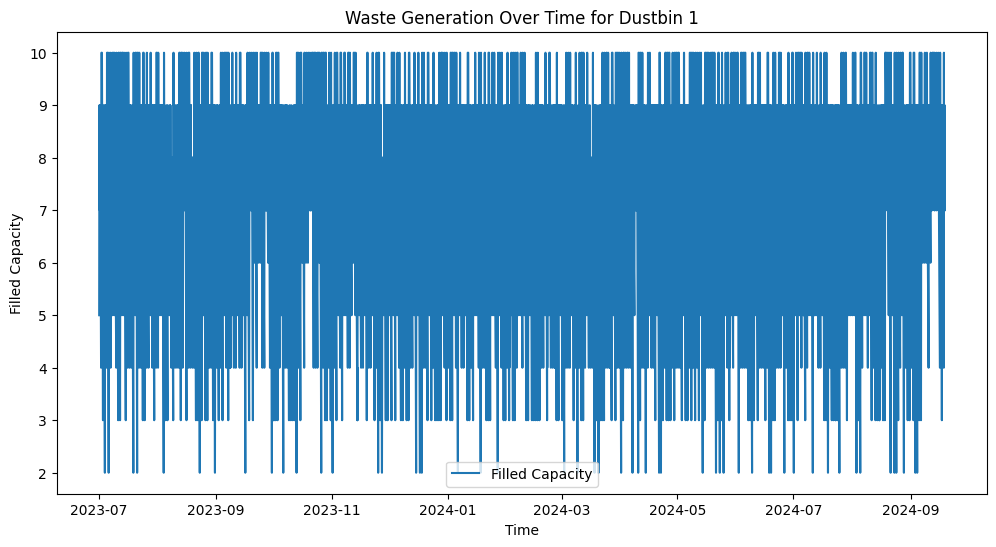

ADF Statistic: -12.521717818772116
p-value: 2.5398087977431513e-23


c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the 

KeyboardInterrupt: 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import math
import itertools

# Load the dataset
data = pd.read_csv("synthetic_waste_data.csv")

# Convert 'date' and 'time' columns to datetime format
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'], format='%Y-%m-%d %H:%M')

# Sort by datetime just to ensure correct order
data = data.sort_values(by='datetime')

# Set datetime as the index for time series analysis
data.set_index('datetime', inplace=True)

# Let's focus on one dustbin for prediction (e.g., dustbin_id=1)
bin_data = data[data['dustbin_id'] == 1]['filled_capacity']

# Visualize the data for dustbin 1
plt.figure(figsize=(12,6))
plt.plot(bin_data, label='Filled Capacity')
plt.title('Waste Generation Over Time for Dustbin 1')
plt.xlabel('Time')
plt.ylabel('Filled Capacity')
plt.legend()
plt.show()

# Split the data into training and testing sets (e.g., 95% train, 5% test)
train_size = int(len(bin_data) * 0.95)
train_data, test_data = bin_data[:train_size], bin_data[train_size:]

# Check stationarity with Augmented Dickey-Fuller test
adf_result = adfuller(train_data)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# Grid Search for SARIMA Parameters
p = d = q = range(0, 3)  # AR, differencing, and MA terms
P = D = Q = range(0, 2)  # Seasonal components
S = [24]  # Seasonality, 24 for daily seasonality

# Generate all possible combinations of p, d, q, P, D, Q
combinations = list(itertools.product(p, d, q, P, D, Q, S))

best_rmse = float('inf')
best_order = None

# Iterate over all parameter combinations
for order in combinations:
    try:
        model = SARIMAX(train_data, order=(order[0], order[1], order[2]),
                        seasonal_order=(order[3], order[4], order[5], order[6]),
                        enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=False)
        predictions = model_fit.forecast(steps=len(test_data))
        rmse = math.sqrt(mean_squared_error(test_data, predictions))
        if rmse < best_rmse:
            best_rmse = rmse
            best_order = order
    except Exception as e:
        continue

print(f'Best SARIMA Order: {best_order} with RMSE: {best_rmse}')

# Fit the best model
model = SARIMAX(train_data, order=(best_order[0], best_order[1], best_order[2]),
                seasonal_order=(best_order[3], best_order[4], best_order[5], best_order[6]),
                enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

# Calculate RMSE for the best model
rmse = math.sqrt(mean_squared_error(test_data, predictions))
print(f'Optimized RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data, label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='red', linestyle='--')
plt.title('Optimized E-SARIMA Predictions vs Actual (Dustbin 1)')
plt.xlabel('Time')
plt.ylabel('Filled Capacity')
plt.legend()
plt.show()

# Full graph combining training and test data
plt.figure(figsize=(12,6))
plt.plot(bin_data.index, bin_data, label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted (Test)', color='red', linestyle='--')
plt.title('Waste Generation - Full Time Series with Optimized E-SARIMA Predictions (Dustbin 1)')
plt.xlabel('Time')
plt.ylabel('Filled Capacity')
plt.legend()
plt.show()


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math

# Custom SARIMA wrapper to make it compatible with sklearn's GridSearchCV
class SARIMAXWrapper:
    def __init__(self, p=1, d=1, q=1, P=1, D=1, Q=1, S=24):
        self.p = p
        self.d = d
        self.q = q
        self.P = P
        self.D = D
        self.Q = Q
        self.S = S
        self.model_fit = None

    # Add the get_params method
    def get_params(self, deep=True):
        return {
            'p': self.p,
            'd': self.d,
            'q': self.q,
            'P': self.P,
            'D': self.D,
            'Q': self.Q,
            'S': self.S
        }

    # Add the set_params method
    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

    def fit(self, X_train, y_train=None):
        self.model = SARIMAX(X_train, 
                             order=(self.p, self.d, self.q),
                             seasonal_order=(self.P, self.D, self.Q, self.S),
                             enforce_stationarity=False, 
                             enforce_invertibility=False)
        self.model_fit = self.model.fit(disp=False)
        return self

    def predict(self, steps):
        return self.model_fit.forecast(steps=steps)

# Define the scorer (RMSE)
def rmse_scorer(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

rmse = make_scorer(rmse_scorer, greater_is_better=False)

# Prepare the data (same as your previous code)
data = pd.read_json("synthetic_waste_data.json")
data['date'] = data['date'].astype(str)
data['time'] = data['time'].astype(str)
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'], format='%Y-%m-%d %H:%M')
data = data.sort_values(by='datetime')
data.set_index('datetime', inplace=True)
bin_data = data[data['dustbin_id'] == 1]['filled_capacity']

# Split the data into 80% train, 10% validation, 10% test
train_size = int(len(bin_data) * 0.80)
validation_size = int(len(bin_data) * 0.10)
train_data = bin_data[:train_size]
validation_data = bin_data[train_size:train_size + validation_size]
test_data = bin_data[train_size + validation_size:]

# Define the parameter grid for grid search
param_grid = {
    'p': [0, 1, 2],   # AR terms
    'd': [0, 1],      # Differencing terms
    'q': [0, 1, 2],   # MA terms
    'P': [0, 1],      # Seasonal AR terms
    'D': [0, 1],      # Seasonal differencing
    'Q': [0, 1],      # Seasonal MA terms
    'S': [24]         # Seasonality (fixed as daily)
}

# Use GridSearchCV to search over the parameter grid
sarima_model = SARIMAXWrapper(p=1, d=1, q=1, P=1, D=1, Q=1, S=24)

grid_search = GridSearchCV(sarima_model, 
                           param_grid=param_grid, 
                           scoring=rmse, 
                           cv=[(slice(None), slice(None))],  # Manual cross-validation for time series
                           verbose=1)

# Reshape data to a format suitable for GridSearchCV
train_data_reshaped = train_data.values.reshape(-1, 1)

# Fit the grid search model using the training data
grid_search.fit(train_data_reshaped, train_data)

# Get the best model from grid search
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Use the best model to make predictions on the validation and test data
validation_predictions = best_model.predict(steps=len(validation_data))
test_predictions = best_model.predict(steps=len(test_data))

# Calculate RMSE for the validation set
validation_rmse = math.sqrt(mean_squared_error(validation_data, validation_predictions))
print(f'Validation RMSE: {validation_rmse}')

# Calculate RMSE for the test set
test_rmse = math.sqrt(mean_squared_error(test_data, test_predictions))
print(f'Test RMSE: {test_rmse}')

# Plot the validation results
plt.figure(figsize=(12,6))
plt.plot(validation_data.index, validation_data, label='Actual (Validation)', color='blue')
plt.plot(validation_data.index, validation_predictions, label='Predicted (Validation)', color='red', linestyle='--')
plt.title('E-SARIMA Predictions vs Actual (Dustbin 1) - Validation')
plt.xlabel('Time')
plt.ylabel('Filled Capacity')
plt.legend()
plt.show()

# Plot the test results
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data, label='Actual (Test)', color='blue')
plt.plot(test_data.index, test_predictions, label='Predicted (Test)', color='red', linestyle='--')
plt.title('E-SARIMA Predictions vs Actual (Dustbin 1) - Test')
plt.xlabel('Time')
plt.ylabel('Filled Capacity')
plt.legend()
plt.show()

# Full graph combining training, validation, and test data
plt.figure(figsize=(12,6))
plt.plot(bin_data.index, bin_data, label='Actual', color='blue')
plt.plot(validation_data.index, validation_predictions, label='Predicted (Validation)', color='orange', linestyle='--')
plt.plot(test_data.index, test_predictions, label='Predicted (Test)', color='red', linestyle='--')
plt.title('Waste Generation - Full Time Series with E-SARIMA Predictions (Dustbin 1)')
plt.xlabel('Time')
plt.ylabel('Filled Capacity')
plt.legend()
plt.show()


Fitting 1 folds for each of 144 candidates, totalling 144 fits


c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py", line 249, in get_index_label_loc
    loc = row_labels.get_loc(key)
          ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'get_loc'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py", line 369, in get_prediction_index
    end, end_index, end_oos = get_index_label_loc(
                              ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\

KeyboardInterrupt: 